In [62]:
import tensorflow as tf

In [63]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\chara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


benign (1).png --> Cluster 1
benign (10).png --> Cluster 1
benign (100).png --> Cluster 1
benign (101).png --> Cluster 1
benign (102).png --> Cluster 1
benign (103).png --> Cluster 1
benign (104).png --> Cluster 1
benign (105).png --> Cluster 1
benign (106).png --> Cluster 0
benign (107).png --> Cluster 0
benign (108).png --> Cluster 0
benign (109).png --> Cluster 1
benign (11).png --> Cluster 1
benign (110).png --> Cluster 0
benign (111).png --> Cluster 1
benign (112).png --> Cluster 1
benign (113).png --> Cluster 1
benign (114).png --> Cluster 0
benign (115).png --> Cluster 1
benign (116).png --> Cluster 0
benign (117).png --> Cluster 1
benign (118).png --> Cluster 1
benign (119).png --> Cluster 0
benign (12).png --> Cluster 1
benign (120).png --> Cluster 0
benign (121).png --> Cluster 1
benign (122).png --> Cluster 0
benign (123).png --> Cluster 1
benign (124).png --> Cluster 1
benign (125).png --> Cluster 0
benign (126).png --> Cluster 1
benign (127).png --> Cluster 0
benign (128).

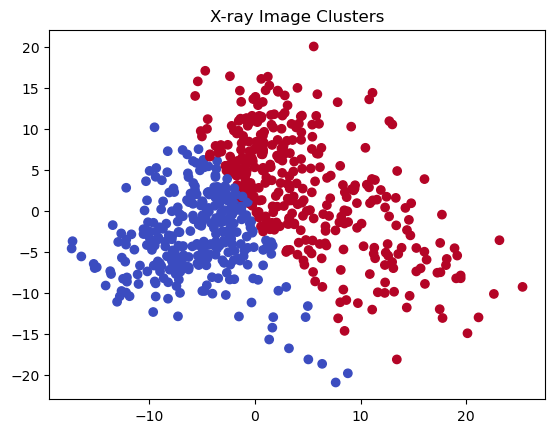

In [64]:
RN50_model = ResNet50(weights='imagenet', include_top=False, pooling='avg') #ResNet50; pre-trained CNN model

featureList = []
fileNames = []

datasetLocation = 'images_xray/' #dataset location
for imgData in os.listdir(datasetLocation): #looping each image data in the dataset location
    if imgData.endswith('.jpg') or imgData.endswith('.png'): #checking for the correct type of file
        imgPath = os.path.join(datasetLocation, imgData) #concatenating the file path and the file name
        img = image.load_img(imgPath, target_size=(224, 224))#loading the image in a format that TensorFlow accepts. Resized the image.
        tfReadArray = image.img_to_array(img)#converting to an array. Makes it readable for tf. Converting the image into 3D
        tfReadArray = np.expand_dims(tfReadArray, axis=0) #Converting the image to 4D (for ResNet50 to read)
        tfReadArray = preprocess_input(tfReadArray) #converting the image to a format ResNet expects
        
        features = RN50_model.predict(tfReadArray, verbose=0)
        featureList.append(features.flatten())  # make it 1D
        fileNames.append(imgData)

flattenedFeatures = np.array(featureList)

'''K-MEANS'''
k = 2  # Try with 2 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(flattenedFeatures)


labels = kmeans.labels_

#output results
for i in range(len(fileNames)):
    print(f"{fileNames[i]} --> Cluster {labels[i]}")



pca = PCA(n_components=2)
pcaResult = pca.fit_transform(flattenedFeatures)

plt.scatter(pca_result[:, 0], pcaResult[:, 1], c=labels, cmap='coolwarm')
plt.title('X-ray Image Clusters')
plt.show()

C:\Users\chara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


benign (1).png --> Cluster 2
benign (10).png --> Cluster 2
benign (100).png --> Cluster 2
benign (101).png --> Cluster 2
benign (102).png --> Cluster 2
benign (103).png --> Cluster 2
benign (104).png --> Cluster 2
benign (105).png --> Cluster 2
benign (106).png --> Cluster 2
benign (107).png --> Cluster 0
benign (108).png --> Cluster 0
benign (109).png --> Cluster 2
benign (11).png --> Cluster 2
benign (110).png --> Cluster 0
benign (111).png --> Cluster 2
benign (112).png --> Cluster 1
benign (113).png --> Cluster 2
benign (114).png --> Cluster 0
benign (115).png --> Cluster 1
benign (116).png --> Cluster 0
benign (117).png --> Cluster 2
benign (118).png --> Cluster 2
benign (119).png --> Cluster 0
benign (12).png --> Cluster 2
benign (120).png --> Cluster 0
benign (121).png --> Cluster 2
benign (122).png --> Cluster 0
benign (123).png --> Cluster 1
benign (124).png --> Cluster 2
benign (125).png --> Cluster 0
benign (126).png --> Cluster 2
benign (127).png --> Cluster 0
benign (128).

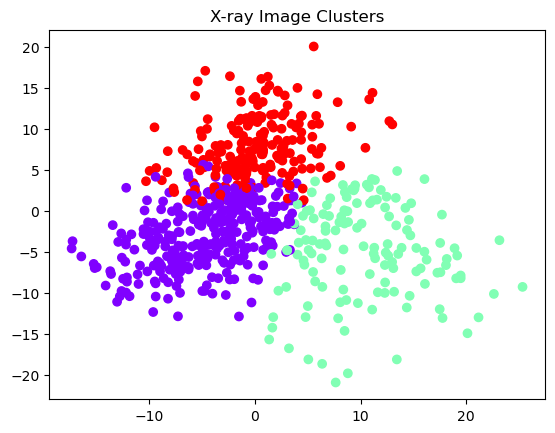

In [65]:
# Apply KMeans
k = 3  # Try with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(flattenedFeatures)

# Get cluster labels
labels = kmeans.labels_

# Print the results
for i in range(len(fileNames)):
    print(f"{fileNames[i]} --> Cluster {labels[i]}")

pca = PCA(n_components=2)
pcaResult = pca.fit_transform(flattenedFeatures)

plt.scatter(pca_result[:, 0], pcaResult[:, 1], c=labels, cmap='rainbow')
plt.title('X-ray Image Clusters')
plt.show()